# Exploratory Analysis of Boris Bike trip data

**Import Libraries and Data and do quick inspection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_hdf('ride_data.hdf', 'df', encoding = 'utf-8')
data.head()

,start_time,rental_id,bike_id,start_id,end_id,end_time,duration
0,2012-01-04 00:00:00,9340768,893,224,169,2012-01-04 00:20:00,00:20:00
1,2012-01-04 00:01:00,9345966,5621,3,319,2012-01-04 00:05:00,00:04:00
2,2012-01-04 00:01:00,9349921,4365,311,343,2012-01-04 00:12:00,00:11:00
3,2012-01-04 00:04:00,9341757,2708,225,379,2012-01-04 00:08:00,00:04:00
4,2012-01-04 00:05:00,9349769,4879,151,225,2012-01-04 00:39:00,00:34:00


In [3]:
print data.dtypes
print data.shape

start_time     datetime64[ns]
rental_id             float64
bike_id               float64
start_id               object
end_id                float64
end_time       datetime64[ns]
duration      timedelta64[ns]
dtype: object
(37266542, 7)


**Filter out some records with obviously oncorrect dates and set index on start_time**

In [4]:
data = data[data.start_time >= '2010-01-01']
data = data[data.end_time >= '2010-01-01']
data = data.set_index('start_time')
data = data.sort_index()

**Function to help plotting**

In [5]:
def plot_rides(type = 'd', start = '2012-01-01', end = '2017-01-01', title = None):
    
    grouping = {'d':'Day', 'h':'Hour', 'hm':'Hour / Minute', 'dh':'Day / Hour', 'dhm':'Day / Hour / Minute'}
    
    plt.figure(figsize=(15, 5))
    plot_data = data.ix[start:end]
    if type == 'd':
        plot_data.groupby(plot_data.index.date).count()['rental_id'].plot()
    elif type == 'h':
        plot_data.groupby(plot_data.index.hour).count()['rental_id'].plot()
    elif type == 'hm':
        plot_data.groupby([plot_data.index.hour, plot_data.index.minute]).count()['rental_id'].plot()
    elif type == 'dh':
        plot_data.groupby([plot_data.index.date, plot_data.index.hour]).count()['rental_id'].plot()
    elif type == 'dhm':
        plot_data.groupby([plot_data.index.date, plot_data.index.hour, plot_data.index.minute]).count()['rental_id'].plot()
    else:
        print 'incorrect grouping passed!'
    if title == None:
        title = 'Rides by ' + grouping[type] + ' ' + start + ' to ' + end 
        plt.suptitle(title, fontsize=20)
    else:
        plt.suptitle(title, fontsize=20)

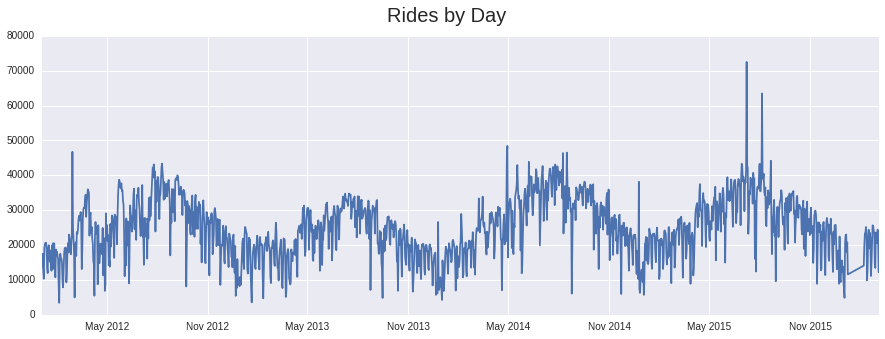

In [6]:
plot_rides(title = 'Rides by Day')

Find the biggest spike. Turns out that it's not bad data but the day of a [Tube Strike](http://www.standard.co.uk/news/london/boris-bike-use-at-twice-normal-level-as-londoners-seek-to-avoid-the-tube-strike-10378279.html)

In [7]:
by_date = data.groupby(data.index.date).count()['rental_id']
by_date[by_date == by_date.max()]

2015-07-09    72503
Name: rental_id, dtype: int64

**Look at some of the low values, below are the 20 lowest recorded**

In [8]:
by_date.sort_values().head(n = 20)

2012-02-05    3438
2013-01-20    3563
2014-01-01    4257
2013-02-10    4732
2013-09-15    4828
2016-01-03    4869
2012-03-04    4986
2013-03-23    5109
2012-12-22    5435
2012-04-09    5467
2013-12-21    5702
2015-01-03    5714
2014-11-23    5960
2014-08-25    6078
2013-12-24    6116
2013-12-23    6190
2014-12-27    6277
2013-03-24    6591
2013-11-09    6644
2014-01-04    6826
Name: rental_id, dtype: int64

The 25th of August 2014 sticks out as a bit of an obvious day to investigate further given that most of the others seem to be around Christmas whereas over the Summer period, you would expect usage to be more consistent.

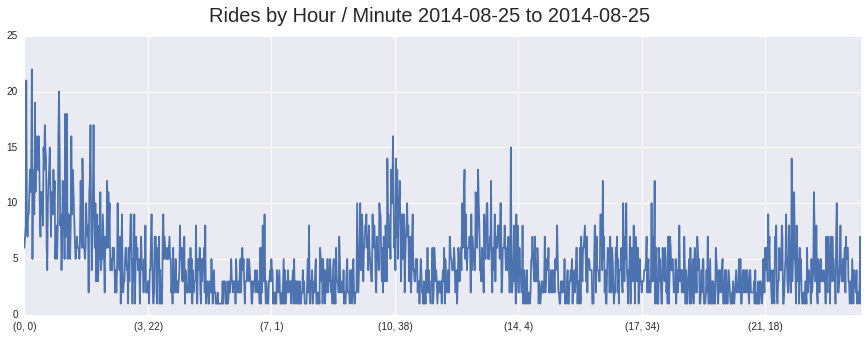

In [9]:
plot_rides('hm', '2014-08-25','2014-08-25')

This pattern is clearly different to the prior week's data both in shape and magnitude! A quick check of the calendar reveals the reason - [Bank Holiday Monday](https://en.wikipedia.org/wiki/Bank_holiday)

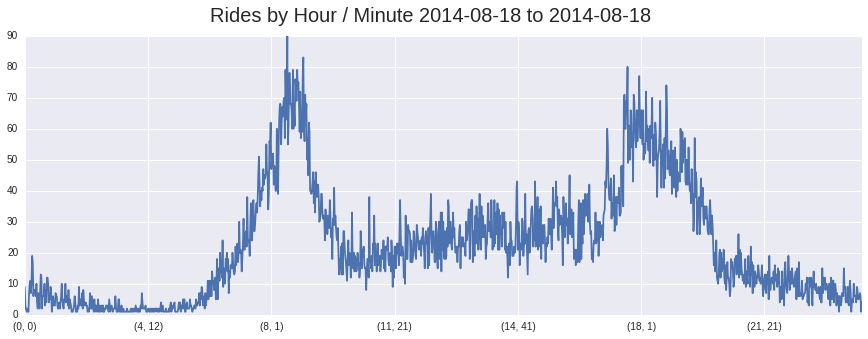

In [10]:
plot_rides('hm', '2014-08-18', '2014-08-18')